# Проект по уроку 7

Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика

In [6]:
from io import BytesIO
import requests
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
your_link = 'https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv'
req = requests.get(your_link)
data = req.content

df = pd.read_csv(BytesIO(data))

In [5]:
df.head()

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0


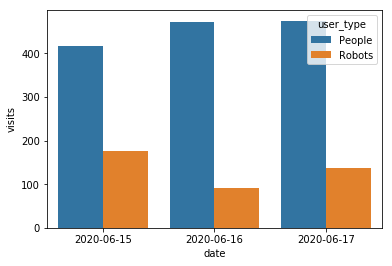

In [8]:
_ = sns.barplot(x=df.date, y=df.visits, hue=df.user_type)

Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome

In [9]:
your_link = 'https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv'
req = requests.get(your_link)
data = req.content

df = pd.read_csv(BytesIO(data))

In [24]:
df.head()

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0


In [32]:
np.round(
df.groupby('browser', as_index=False) \
    .agg({'visits':'sum'}) \
    .query('browser == "Google Chrome"')['visits'] \
    .values / \
df.groupby('browser', as_index=False) \
    .agg({'visits':'sum'})['visits'].sum() * 100, 
    0)[0]
        

60.0

Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений?

In [81]:
your_link = 'https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv'
req = requests.get(your_link)
data = req.content

df = pd.read_csv(BytesIO(data))

In [95]:
df.groupby('browser', as_index=False).agg({'visits':'sum'})#считаем общее количество визитов по браузерам

,browser,visits
0,Android Browser,1.0
1,Chrome Mobile,31.0
2,Chromium,2.0
3,CocCoc,1.0
4,Edge,5.0
5,Firefox,58.0
6,Google Chrome,354.0
7,Mobile Safari,16.0
8,Opera,16.0
9,Safari,41.0


In [96]:
df_new = df.query('user_type == "Robots"')# выбираем только роботов

In [97]:
df_new = df_new.rename(columns={'visits':'robot_visits'})

In [99]:
merged_df = df.groupby('browser', as_index=False) \
    .agg({'visits':'sum'}) \
    .merge(df_new, on='browser')#объединяем df по браузеру

In [102]:
merged_df['part'] = merged_df['robot_visits'] / merged_df['visits']
merged_df.sort_values(by='part')

,browser,visits,date,user_type,robot_visits,part
4,Mobile Safari,16.0,2020-06-15,Robots,1.0,0.062500
7,Samsung Internet,9.0,2020-06-15,Robots,1.0,0.111111
9,Yandex Browser,54.0,2020-06-15,Robots,7.0,0.129630
1,Edge,5.0,2020-06-15,Robots,1.0,0.200000
3,Google Chrome,354.0,2020-06-15,Robots,104.0,0.293785
5,Opera,16.0,2020-06-15,Robots,5.0,0.312500
0,Chromium,2.0,2020-06-15,Robots,1.0,0.500000
2,Firefox,58.0,2020-06-15,Robots,31.0,0.534483
6,Safari,41.0,2020-06-15,Robots,22.0,0.536585
8,UCWEB,4.0,2020-06-15,Robots,4.0,1.000000


Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [103]:
your_link = 'https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv'
req = requests.get(your_link)
data = req.content

df = pd.read_csv(BytesIO(data))

In [104]:
df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [108]:
df['visits'].sum()

594.0

In [127]:
grouped_df = df.groupby(['browser', 'user_type', 'date'], as_index=False).agg({'visits':'sum'})

In [128]:
grouped_df['part'] = grouped_df['visits'] / df['visits'].sum()

In [129]:
grouped_df

,browser,user_type,date,visits,part
0,Android Browser,People,2020-06-15,1.0,0.001684
1,Chrome Mobile,People,2020-06-15,31.0,0.052189
2,Chromium,People,2020-06-15,1.0,0.001684
3,Chromium,Robots,2020-06-15,1.0,0.001684
4,CocCoc,People,2020-06-15,1.0,0.001684
5,Edge,People,2020-06-15,4.0,0.006734
6,Edge,Robots,2020-06-15,1.0,0.001684
7,Firefox,People,2020-06-15,27.0,0.045455
8,Firefox,Robots,2020-06-15,31.0,0.052189
9,Google Chrome,People,2020-06-15,250.0,0.420875


In [130]:
np.round(grouped_df.query('user_type == "People" & browser == "Safari"')['part'].values *100 ,1)

array([3.2])

Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

In [131]:
your_link = 'https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv'
req = requests.get(your_link)
data = req.content

my_df = pd.read_csv(BytesIO(data))

In [141]:
my_df.shape

(24, 4)

In [145]:
my_df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [142]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [143]:
df.shape

(24, 4)

In [135]:
df.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [139]:
merged_df = df.merge(my_df, on=['browser','date', 'user_type'])

In [150]:
merged_df['part'] = merged_df['visits'] / merged_df['users']
np.round(merged_df.query('browser == "Google Chrome" & user_type == "Robots"')['part'].values, 0)

array([1.])